In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
from datasets import build_pdebench_dataset
from utils import AttrDict

In [2]:
N = 224
T = 16

args = AttrDict({'data_set': 'compNS_turb',
                 'mask_type': 'tube',
                 'mask_ratio': 0.9,
                 'input_size': N,
                 'window_size': (T//2, N//16, N//16),
                 'num_frames': T,
                 'data_tmp_copy': False,
                 'gpu': 0})

In [3]:
dataset_train = build_pdebench_dataset(args, 'train')
dataset_val = build_pdebench_dataset(args, 'val')
dataset_test = build_pdebench_dataset(args, 'test')

Raw dataset compNS_turb has 1000 samples of shape (512, 512) and 21 timesteps.
Raw dataset compNS_turb has 1000 samples of shape (512, 512) and 21 timesteps.
Raw dataset compNS_turb has 1000 samples of shape (512, 512) and 21 timesteps.


In [4]:
data, mask = dataset_train[0]
print(dataset_train.dataset_name, dataset_train.fields)
print(data.shape, mask.shape)

compNS_turb ['Vx', 'Vy', 'density']
torch.Size([3, 16, 224, 224]) (1568,)


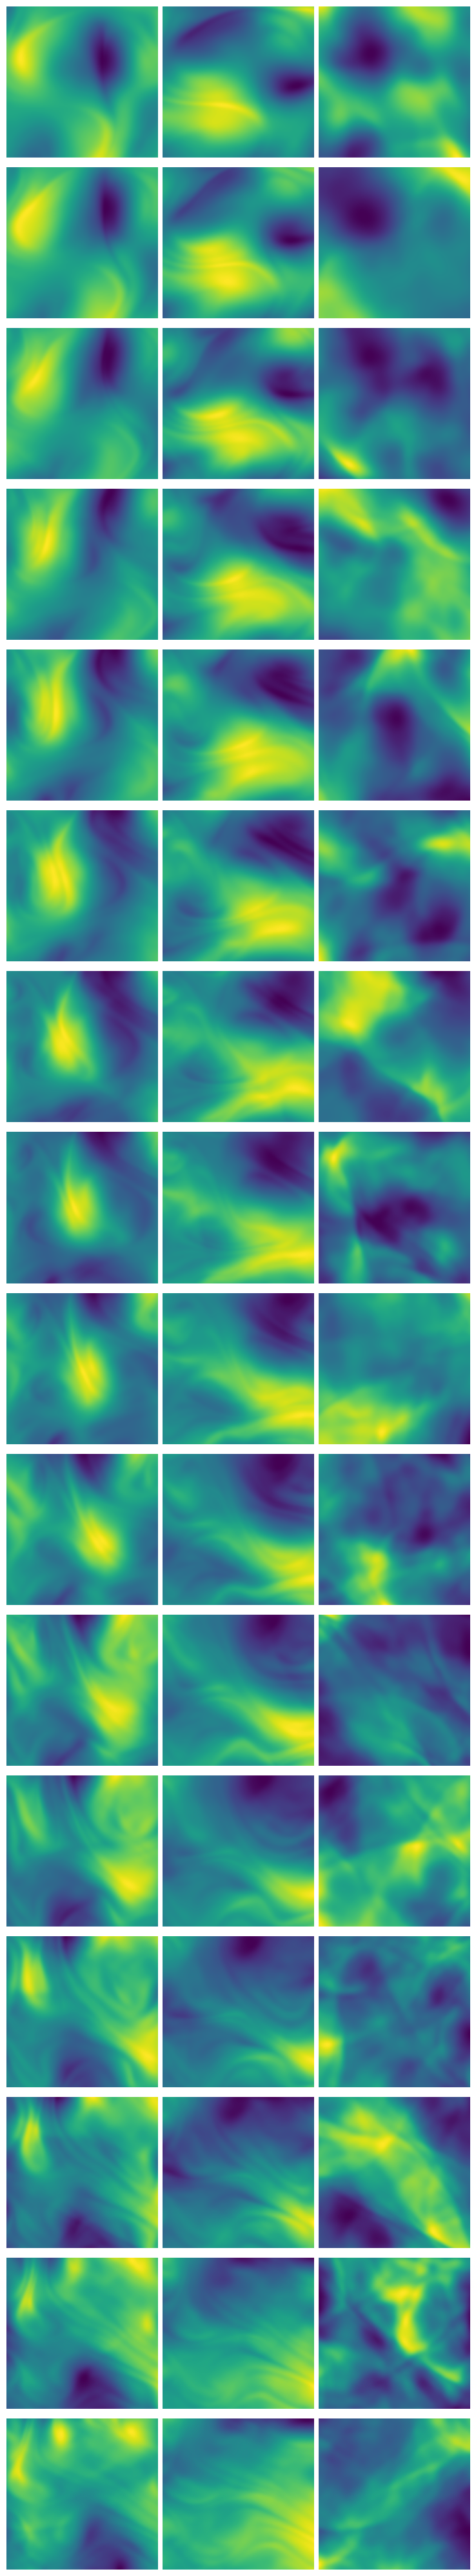

In [5]:
fig, axs = plt.subplots(data.shape[1], len(dataset_train.fields), figsize=(2.5*len(dataset_train.fields), 2.5*data.shape[1]))
for i in range(data.shape[1]):
    for j in range(len(dataset_train.fields)):
        axs[i, j].imshow(data[j, i])
        axs[i, j].axis('off')
fig.tight_layout()